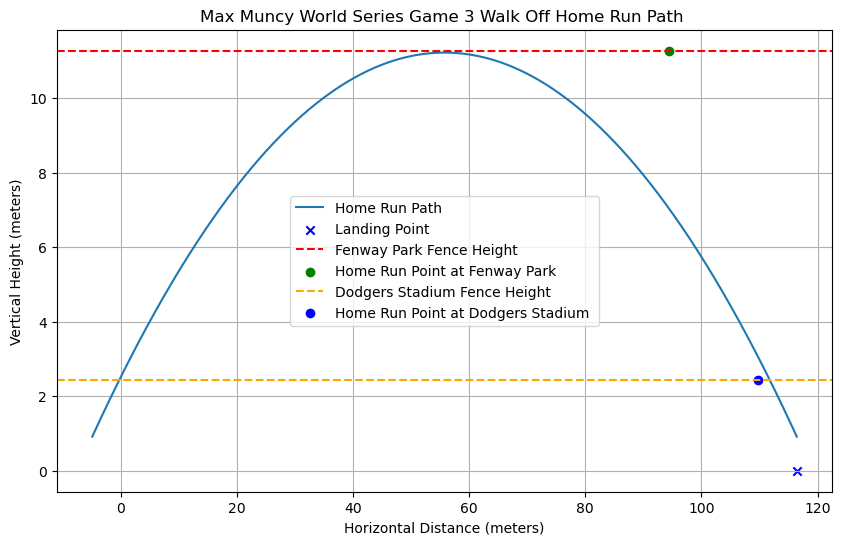

In [46]:
import matplotlib.pyplot as plt
import numpy as np

def mph_to_mps(velocity_mph):
    # Convert miles per hour to meters per second
    return velocity_mph * 0.44704

def feet_to_meters(distance_feet):
    # Convert feet to meters
    return distance_feet * 0.3048

def plot_home_run(exit_velocity_mph, landing_distance_feet, contact_height_feet, fenway_fence_height_feet, fenway_fence_distance_feet, dodgers_fence_height_feet, dodgers_dot_distance_feet):
    g = 9.8  # Acceleration due to gravity (m/s^2)

    # Convert all units
    exit_velocity = mph_to_mps(exit_velocity_mph)
    landing_distance = feet_to_meters(landing_distance_feet)
    contact_height = feet_to_meters(contact_height_feet)
    fenway_fence_height = feet_to_meters(fenway_fence_height_feet)
    fenway_fence_distance = feet_to_meters(fenway_fence_distance_feet)
    dodgers_fence_height = feet_to_meters(dodgers_fence_height_feet)
    dodgers_dot_distance = feet_to_meters(dodgers_dot_distance_feet)

    # Assume a range of launch angles
    launch_angle_range = np.linspace(1, 89, 100)
    found_solution = False

    # Iterate through launch angles to find the one matching the landing distance
    for launch_angle_deg in launch_angle_range:
        # Calculate the time of flight
        time_of_flight = (2 * exit_velocity * np.sin(np.radians(launch_angle_deg))) / g

        # Calculate the trajectory
        t = np.linspace(0, time_of_flight, num=1000)
        x = exit_velocity * np.cos(np.radians(launch_angle_deg)) * t
        y = contact_height + exit_velocity * np.sin(np.radians(launch_angle_deg)) * t - 0.5 * g * t**2

        # Check if the landing distance matches the specified value
        if x[-1] >= landing_distance:
            found_solution = True
            break

    # Plot the trajectory, the Fenway Park fence, the Home Run Point at Fenway Park, and the Dodgers Stadium fence
    if found_solution:
        # Move trajectory horizontally to start at zero
        x += landing_distance - x[-1]

        # Plot the trajectory
        plt.figure(figsize=(10, 6))
        plt.plot(x, y, label='Home Run Path')

        # Mark the landing point
        plt.scatter(landing_distance, 0, color='b', marker='x', label='Landing Point')

        # Plot the Fenway Park fence
        plt.axhline(y=fenway_fence_height, color='r', linestyle='--', label='Fenway Park Fence Height')

        # Mark the Home Run Point at Fenway Park
        plt.scatter(fenway_fence_distance, fenway_fence_height, color='green', marker='o', label='Home Run Point at Fenway Park')

        # Plot the Dodgers Stadium fence
        plt.axhline(y=dodgers_fence_height, color='orange', linestyle='--', label='Dodgers Stadium Fence Height')

        # Mark the dot on the Dodgers Stadium fence
        plt.scatter(dodgers_dot_distance, dodgers_fence_height, color='blue', marker='o', label='Home Run Point at Dodgers Stadium ')

        # Customize the plot
        plt.title('Max Muncy World Series Game 3 Walk Off Home Run Path ')
        plt.xlabel('Horizontal Distance (meters)')
        plt.ylabel('Vertical Height (meters)')
        plt.legend()
        plt.grid(True)
        plt.show()
    else:
        print("No solution found within the given launch angle range.")

# Example parameters
exit_velocity_mph = 98.8  # in mph
landing_distance_feet = 382  # in feet
contact_height_feet = 3  # in feet
fenway_fence_height_feet = 37  # in feet
fenway_fence_distance_feet = 310  # in feet
dodgers_fence_height_feet = 8  # in feet
dodgers_dot_distance_feet = 360  # in feet

# Plot the home run path with Fenway Park fence, Home Run Point at Fenway Park, Dodgers Stadium fence, and dot on Dodgers Stadium fence
plot_home_run(exit_velocity_mph, landing_distance_feet, contact_height_feet, fenway_fence_height_feet, fenway_fence_distance_feet, dodgers_fence_height_feet, dodgers_dot_distance_feet)
